In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dfx=pd.read_csv("C:\\Users\\Dell\\Downloads\\Linear_X_Train.csv")
dfy=pd.read_csv("C:\\Users\\Dell\\Downloads\\Linear_Y_Train.csv")


In [37]:
x=dfx.values
y=dfy.values
x=x.reshape((-1,))
y=y.reshape((-1,))

NameError: name 'mean' is not defined

In [6]:
split=int(0.8*x.shape[0])
split

3000

In [11]:
x_train=x[:split,]
y_train=y[:split,]
x_test=x[split:,]
y_test=y[split:,]

(3000,)

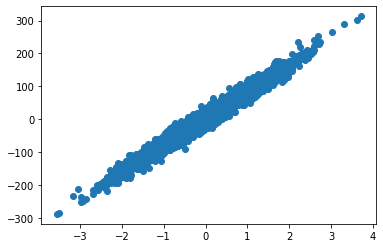

In [12]:
plt.scatter(x_train,y_train)

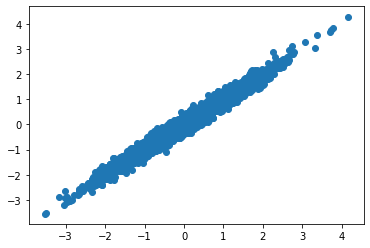

In [16]:
  plt.scatter(x_train,y_train)

In [13]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [14]:
def error(x,theta,y):
    err=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],theta)
        err+=(hx-y[i])**2
        
    return err

In [15]:
def gradient(x,theta,y):
    m=x.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        hx=hypothesis(x[i],theta)
        grad[0]+= (hx-y[i])
        grad[1]+= (hx-y[i])*x[i]
    return grad/m    
        
        

In [16]:
def gradientDescent(x,y,learning_rate=.001):
    theta = np.zeros((2,))
    
    err_list = []
    theta_list = []
    
    for i in range(2000):
        grad = gradient(x,theta,y)
        err = error(x,theta,y)
        
        err_list.append(err)
        theta_list.append((theta[0],theta[1]))
        
        theta[0] -= (learning_rate*(grad[0]))
        theta[1] -= (learning_rate*grad[1])
    
    return theta,err_list,theta_list

In [17]:
t,e,tl=gradientDescent(x_train,y_train)

In [18]:
t

array([ 2.80886672, 68.92941341])

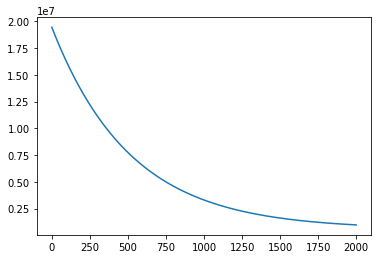

In [19]:
plt.plot(e)

In [56]:
X_test=pd.read_csv("C:\\Users\\Dell\\Downloads\\Linear_X_Test.csv")
X_test = X_test.values
X_test = X_test.reshape((-1,))
print(X_test.shape)
x_test = X_test

(1250,)


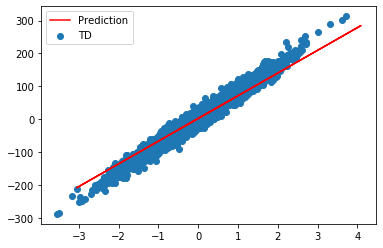

In [20]:
plt.scatter(x_train,y_train,label="TD")
plt.plot(x_test,hypothesis(x_test,t),color="red",label="Prediction")
plt.legend()
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

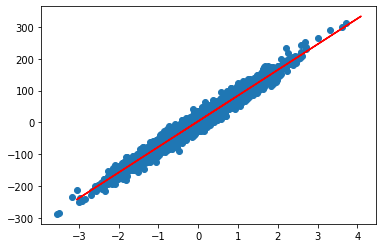

In [33]:
x=x_train.reshape((-1,1))
y=y_train.reshape((-1,1))
x_test=x_test.reshape((-1,1))
model=LinearRegression()
model.fit(x,y)
output=model.predict(x_test)
plt.scatter(x,y)
plt.plot(x_test,output,color="red")
